In [4]:
import pandas as pd
# 数据加载
file_dir = '/Volumes/GoogleDrive/我的雲端硬碟/python/東海大學/Ｒ程式語言實作/國泰金控大數據比賽原始資料/'
train_buy_data = pd.read_csv(file_dir + 'train_buy_info.csv')
train_cust_data = pd.read_csv(file_dir + 'train_cust_info.csv')
train_tpy_data = pd.read_csv(file_dir + 'train_tpy_info.csv')

test_buy_x_data = pd.read_csv(file_dir + 'test_buy_x_info.csv')
test_cust_x_data = pd.read_csv(file_dir + 'test_cust_x_info.csv')
test_tpy_x_data = pd.read_csv(file_dir + 'test_tpy_x_info.csv')

"""
test集未包含y預測值
1. 依據train建立模型
2. K折拆分預測模型準確率
3. 將test集輸入模型，輸出結果，將結果寫進excel檔中
"""


# test_data = pd.read_csv('./Titanic_Data/test.csv')
# 数据探索
# print(train_data.info())
# print('-'*30)
# print(train_data.describe())
# print('-'*30)
# print(train_data.describe(include=['O']))
# print('-'*30)
# print(train_data.head())
# print('-'*30)
# print(train_data.tail())

In [5]:
print(train_buy_data.info())
"""
看個欄位儲存的資料格式，確認欄位數，缺值數。

1. 13個欄位有['CUST_ID', 'BUY_TYPE', 'AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'OCCUPATION',
       'CHILD_NUM', 'BUY_MONTH', 'BUY_YEAR', 'CITY_CODE', 'BUDGET',
       'MARRIAGE']
2. 229504筆資料，其中HEIGHT, WEIGHT有缺值
3. Buy_type有7種，該欄取為預測的y值
"""

print('-'*30)
print(train_buy_data.describe())
"""
僅列出int, float欄位
"""
print('-'*30)
print(train_buy_data.describe(include=['O']))
"""
describe出object的欄位
1. buy_year可以drop掉，因為資料都是同一年
2. occupation職業別
"""
print('-'*30)
print(train_buy_data.head())
print('-'*30)
print(train_buy_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229504 entries, 0 to 229503
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CUST_ID     229504 non-null  int64  
 1   BUY_TYPE    229504 non-null  object 
 2   AGE         229504 non-null  object 
 3   SEX         229504 non-null  object 
 4   HEIGHT      212696 non-null  float64
 5   WEIGHT      212696 non-null  float64
 6   OCCUPATION  229504 non-null  object 
 7   CHILD_NUM   229504 non-null  int64  
 8   BUY_MONTH   229504 non-null  int64  
 9   BUY_YEAR    229504 non-null  object 
 10  CITY_CODE   229504 non-null  object 
 11  BUDGET      229504 non-null  float64
 12  MARRIAGE    229504 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 22.8+ MB
None
------------------------------
            CUST_ID         HEIGHT         WEIGHT      CHILD_NUM  \
count  2.295040e+05  212696.000000  212696.000000  229504.000000   
mean   1.497660e+06     

In [12]:
train_buy_data['HEIGHT'].fillna(train_buy_data['HEIGHT'].mean(), inplace=True)
train_buy_data['WEIGHT'].fillna(train_buy_data['WEIGHT'].mean(), inplace=True)
train_buy_data.info()

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


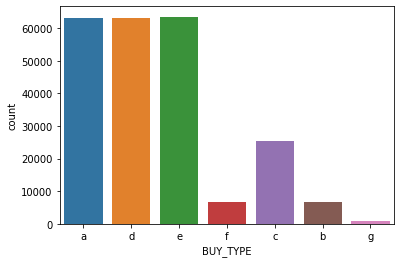

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train_buy_data['BUY_TYPE'],label="Count")
plt.show()

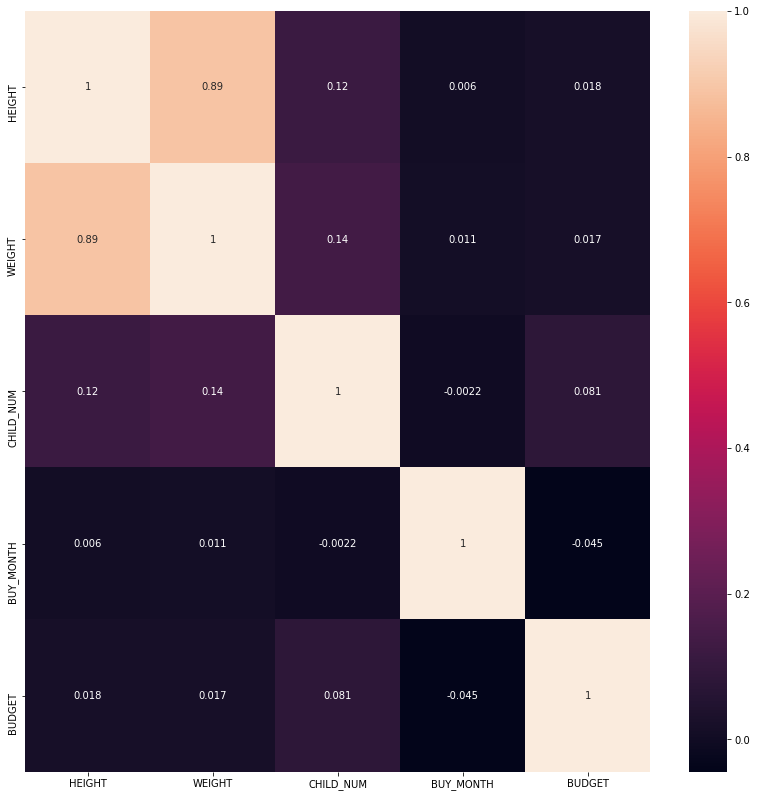

In [20]:
features = ['AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'OCCUPATION',
       'CHILD_NUM', 'BUY_MONTH', 'CITY_CODE', 'BUDGET',
       'MARRIAGE']
corr = train_buy_data[features].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
# 身高與體重較相關，選其中一個即可

In [29]:
train_buy_data['BUY_TYPE']=train_buy_data['BUY_TYPE'].map({'a':1,'d':2, 'e':3, 'f':4, 'c':5, 'b':6, 'g':7})

In [30]:
from sklearn.model_selection import train_test_split

features = ['AGE', 'SEX', 'HEIGHT', 'OCCUPATION',
       'CHILD_NUM', 'CITY_CODE', 'BUDGET',
       'MARRIAGE']

train_buy, test_buy = train_test_split(train_buy_data, test_size = 0.3)
train_x = train_buy[features]
train_y = train_buy['BUY_TYPE']
test_x = test_buy[features]
test_y =test_buy['BUY_TYPE']

In [31]:
from sklearn import svm
from sklearn import metrics

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_x,train_y)
# 用测试集做预测
prediction=model.predict(test_x)
print('准确率: ', metrics.accuracy_score(test_x,prediction))

ValueError: could not convert string to float: 'a'

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

ValueError: could not convert string to float: 'a'